In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Jacobian

In [ ]:
# Load the CSV file into a pandas DataFrame
# data_j = pd.read_csv('J_seq_results.csv')
data_j_o = pd.read_csv('results_seq_j_O0.csv')
data_j_o1 = pd.read_csv('results_seq_j_O1.csv')
data_j_o2 = pd.read_csv('results_seq_j_O2.csv')
data_j_o3 = pd.read_csv('results_seq_j_O3.csv')
data_j_ofast = pd.read_csv('results_seq_j_Ofast.csv')

data_j_o["Time"] = data_j_o["Time"] * 1e3  # Convert time to milliseconds for better readability
data_j_o1["Time"] = data_j_o1["Time"] * 1e3  # Convert time to milliseconds for better readability
data_j_o2["Time"] = data_j_o2["Time"] * 1e3  # Convert time to milliseconds for better readability
data_j_o3["Time"] = data_j_o3["Time"] * 1e3  # Convert time to milliseconds for better readability
data_j_ofast["Time"] = data_j_ofast["Time"] * 1e3

### Number of iterations versus temperature

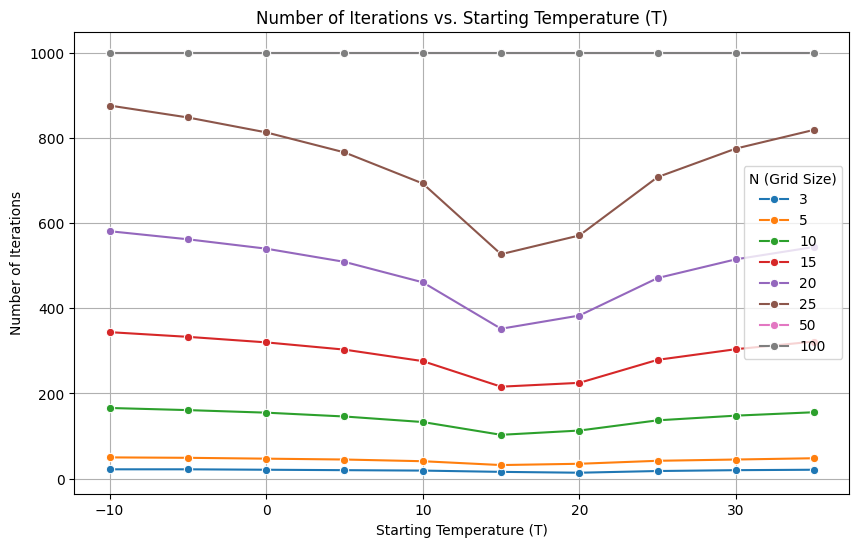

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_j_o, x='T', y='Iterations', hue='N', marker='o', palette='tab10')
plt.title("Number of Iterations vs. Starting Temperature (T)")
plt.xlabel("Starting Temperature (T)")
plt.ylabel("Number of Iterations")
plt.legend(title="N (Grid Size)")
plt.grid(True)
plt.show()


### Difference vs Number of iterations

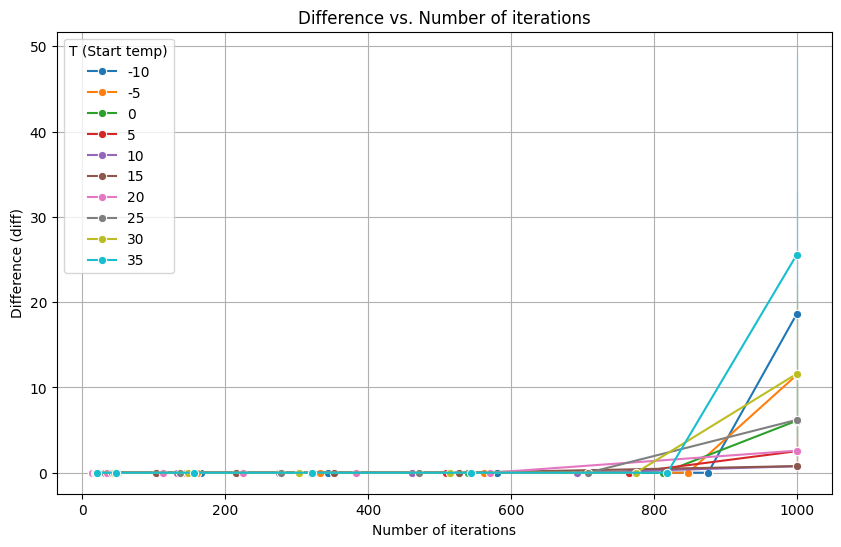

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_j_o, x='Iterations', y='Diff', hue='T', marker='o', palette='tab10')
plt.title("Difference vs. Number of iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Difference (diff)")
plt.legend(title="T (Start temp)")
plt.grid(True)
plt.show()


### Heatmap of Iterations or Computation Time


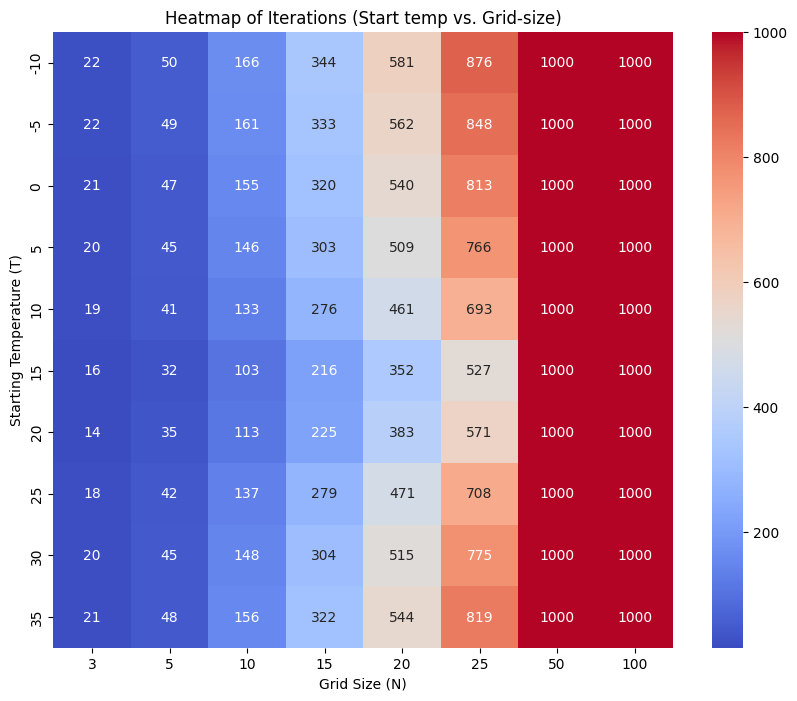

In [ ]:
heatmap_data = data_j_o.pivot(index="T", columns="N", values="Iterations")  # Or use "time" for computation time
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="coolwarm")
plt.title("Heatmap of Iterations (Start temp vs. Grid-size)")
plt.xlabel("Grid Size (N)")
plt.ylabel("Starting Temperature (T)")
plt.show()


### Grid size and computation time

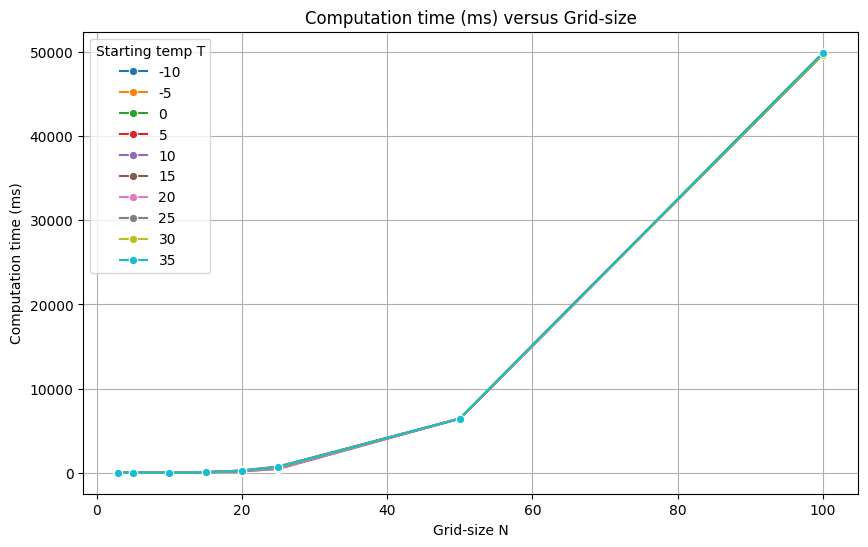

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_j_o, x='N', y='Time', hue='T', marker='o', palette='tab10')
plt.title("Computation time (ms) versus Grid-size")
plt.xlabel("Grid-size N")
plt.ylabel("Computation time (ms)")
plt.legend(title="Starting temp T")
plt.grid(True)
plt.show()

### Grid size and number of iterations

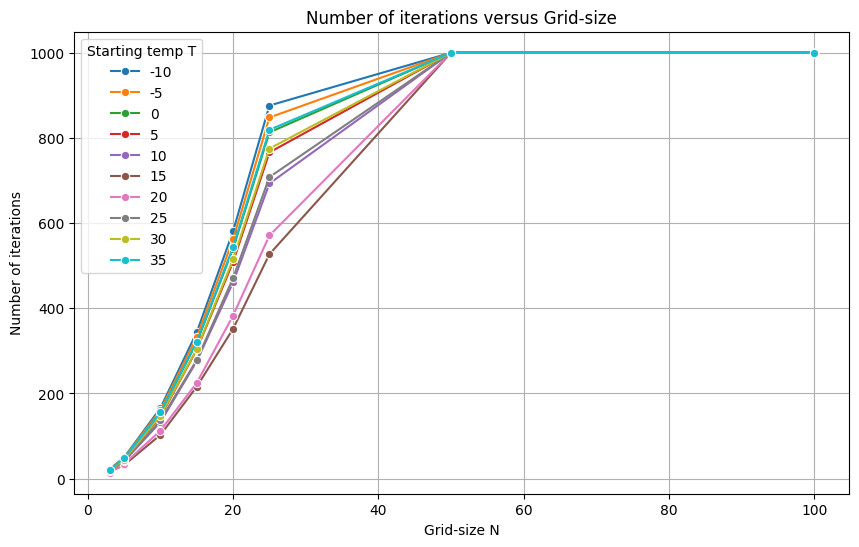

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_j_o, x='N', y='Iterations', hue='T', marker='o', palette='tab10')
plt.title("Number of iterations versus Grid-size")
plt.xlabel("Grid-size N")
plt.ylabel("Number of iterations")
plt.legend(title="Starting temp T")
plt.grid(True)
plt.show()

## Comparing compiler options

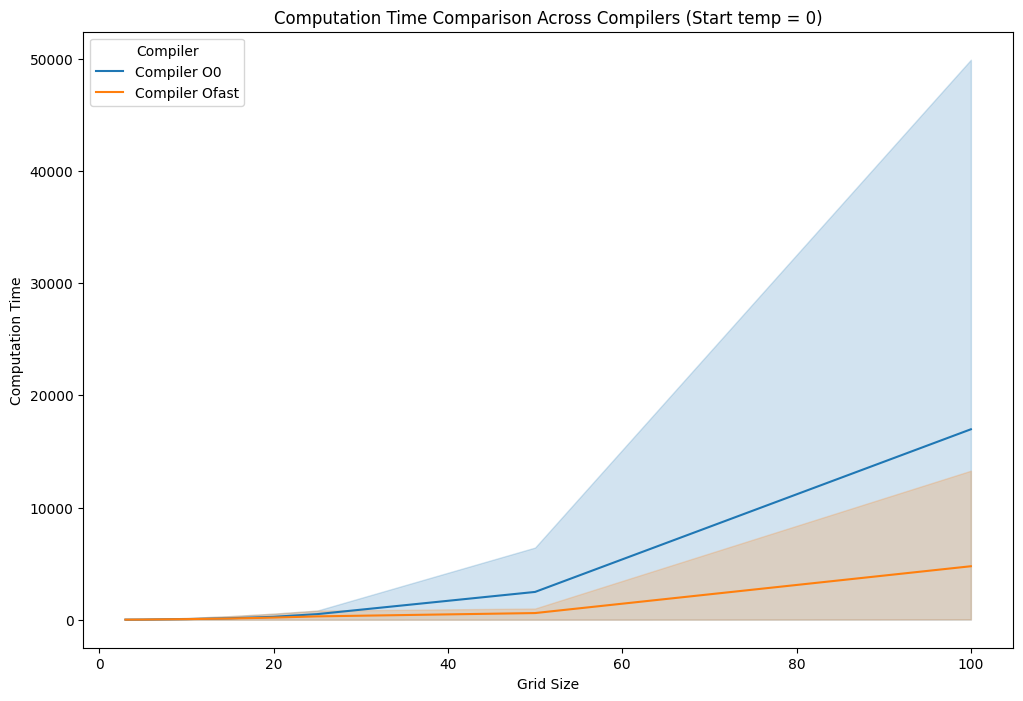

In [ ]:
data_j_o['compiler'] = 'Compiler O0'
data_j_o1['compiler'] =  'Compiler O1'
data_j_o2['compiler'] =  'Compiler O2'
data_j_o3['compiler'] =  'Compiler O3'
data_j_ofast['compiler'] =  'Compiler Ofast'

df_combined = pd.concat([data_j_o, data_j_ofast], ignore_index=True)
df_combined = pd.melt(df_combined, id_vars=['N', 'compiler', 'T'], var_name='performance_metric')


# Filter the data to include only the rows where T = 0
df_combined_zero_temp = df_combined[df_combined['T'] == 0]

# Plotting using seaborn
plt.figure(figsize=(12, 8))

sns.lineplot(data=df_combined_zero_temp, x='N', y='value', hue='compiler', markers=True)

# Adding labels and title
plt.xlabel('Grid Size')
plt.ylabel('Computation Time')
plt.title('Computation Time Comparison Across Compilers (Start temp = 0)')

plt.legend(title='Compiler')
plt.show()


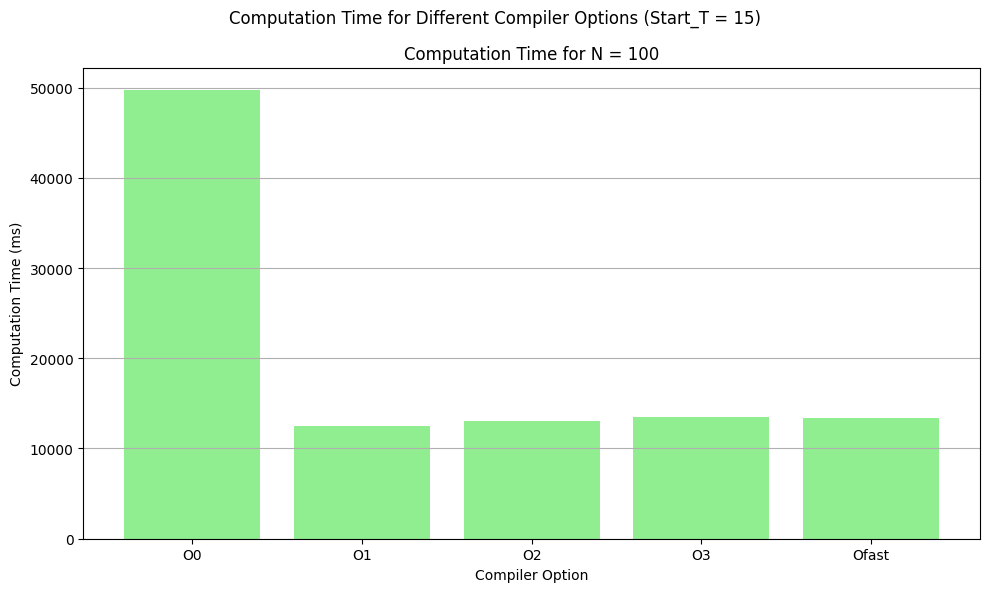

In [ ]:
# DataFrames (replace these with your actual dataframes)
dataframes = {
    'Compiler O0': data_j_o,
    'Compiler O1': data_j_o1,
    'Compiler O2': data_j_o2,
    'Compiler O3': data_j_o3,
    'Compiler Ofast': data_j_ofast
}

# Filtered data for N = 5 and N = 100, T = 15
data_filtered_o0_N100 = data_j_o[(data_j_o['N'] == 100) & (data_j_o['T'] == 15)]
data_filtered_o1_N100 = data_j_o1[(data_j_o1['N'] == 100) & (data_j_o1['T'] == 15)]
data_filtered_o2_N100 = data_j_o2[(data_j_o2['N'] == 100) & (data_j_o2['T'] == 15)]
data_filtered_o3_N100 = data_j_o3[(data_j_o3['N'] == 100) & (data_j_o3['T'] == 15)]
data_filtered_ofast_N100 = data_j_ofast[(data_j_ofast['N'] == 100) & (data_j_ofast['T'] == 15)]
import matplotlib.pyplot as plt

# Collecting data for N=50 and N=100
compilers = ['O0', 'O1', 'O2', 'O3', 'Ofast']

data_N100 = [
    data_filtered_o0_N100['Time'].values[0],
    data_filtered_o1_N100['Time'].values[0],
    data_filtered_o2_N100['Time'].values[0],
    data_filtered_o3_N100['Time'].values[0],
    data_filtered_ofast_N100['Time'].values[0]
]

# Create subplots
plt.figure(figsize=(10, 6))
# Bar plot for N=100
plt.bar(compilers, data_N100, color='lightgreen')
plt.title('Computation Time for N = 100')
plt.xlabel('Compiler Option')
plt.ylabel('Computation Time (ms)')
plt.grid(axis='y')

# Overall layout
plt.suptitle('Computation Time for Different Compiler Options (Start_T = 15)')
plt.tight_layout()
plt.show()



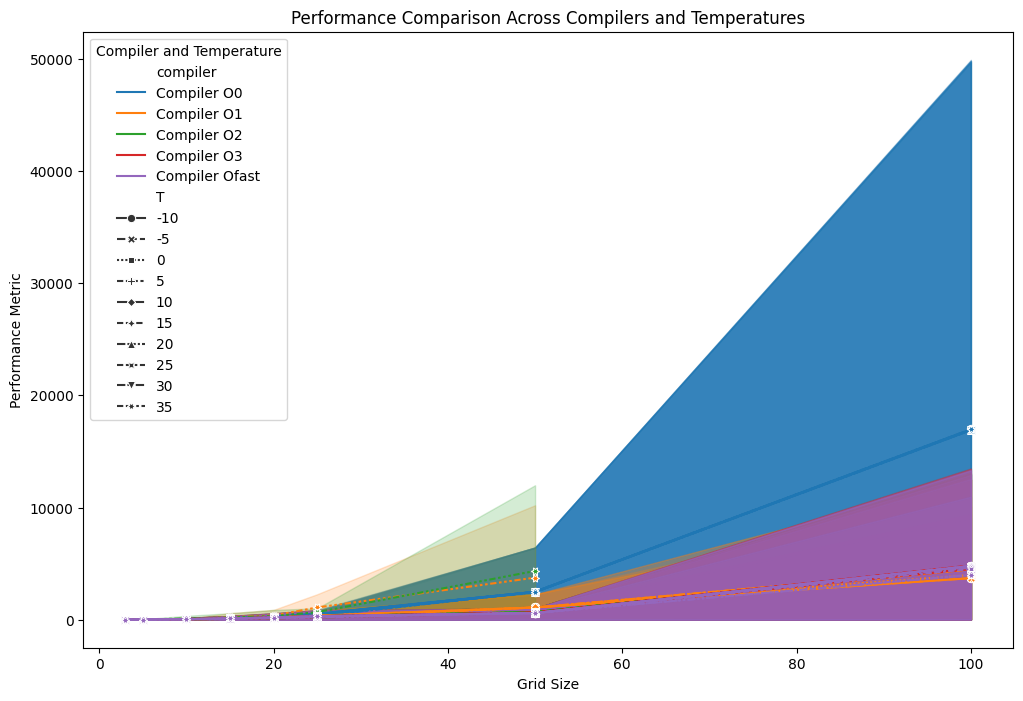

In [ ]:
data_j_o['compiler'] = 'Compiler O0'
data_j_o1['compiler'] =  'Compiler O1'
data_j_o2['compiler'] =  'Compiler O2'
data_j_o3['compiler'] =  'Compiler O3'
data_j_ofast['compiler'] =  'Compiler Ofast'

df_combined = pd.concat([data_j_o, data_j_o1, data_j_o2, data_j_o3, data_j_ofast], ignore_index=True)
df_combined = pd.melt(df_combined, id_vars=['N', 'compiler', 'T'], var_name='performance_metric')

# Plotting using seaborn
plt.figure(figsize=(12, 8))

sns.lineplot(data=df_combined, x='N', y='value', hue='compiler', style='T', markers=True)

# Adding labels and title
plt.xlabel('Grid Size')
plt.ylabel('Performance Metric')
plt.title('Performance Comparison Across Compilers and Temperatures')

plt.legend(title='Compiler and Temperature')
plt.show()

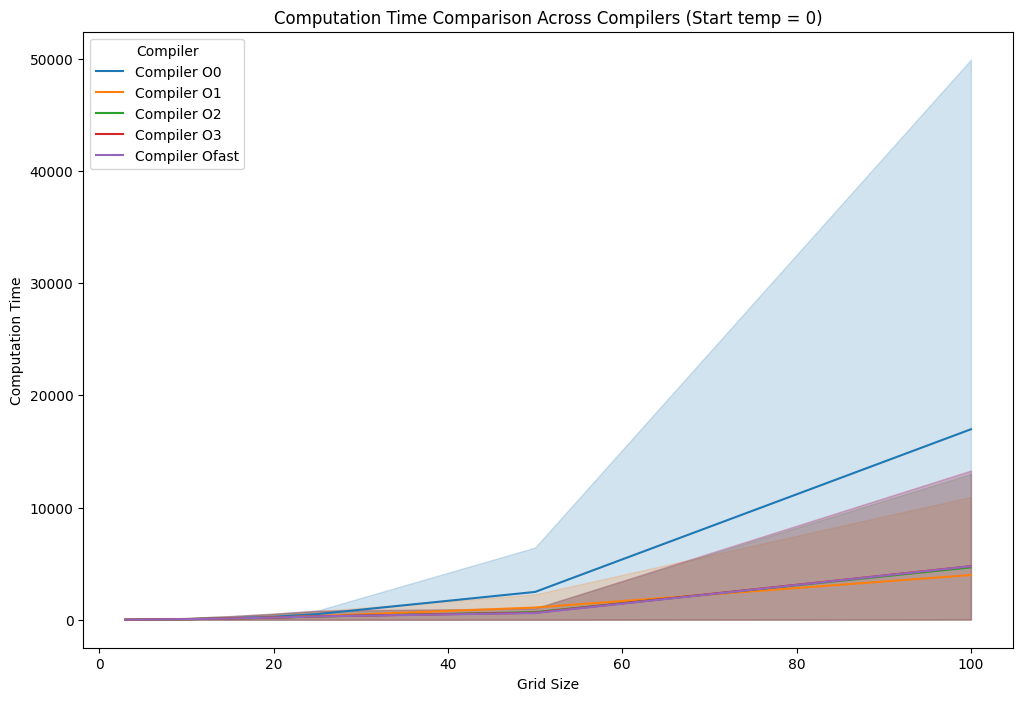

In [ ]:
# Filter the data to include only the rows where T = 0
df_combined_zero_temp = df_combined[df_combined['T'] == 0]

# Plotting using seaborn
plt.figure(figsize=(12, 8))

sns.lineplot(data=df_combined_zero_temp, x='N', y='value', hue='compiler', markers=True)

# Adding labels and title
plt.xlabel('Grid Size')
plt.ylabel('Computation Time')
plt.title('Computation Time Comparison Across Compilers (Start temp = 0)')

plt.legend(title='Compiler')
plt.show()


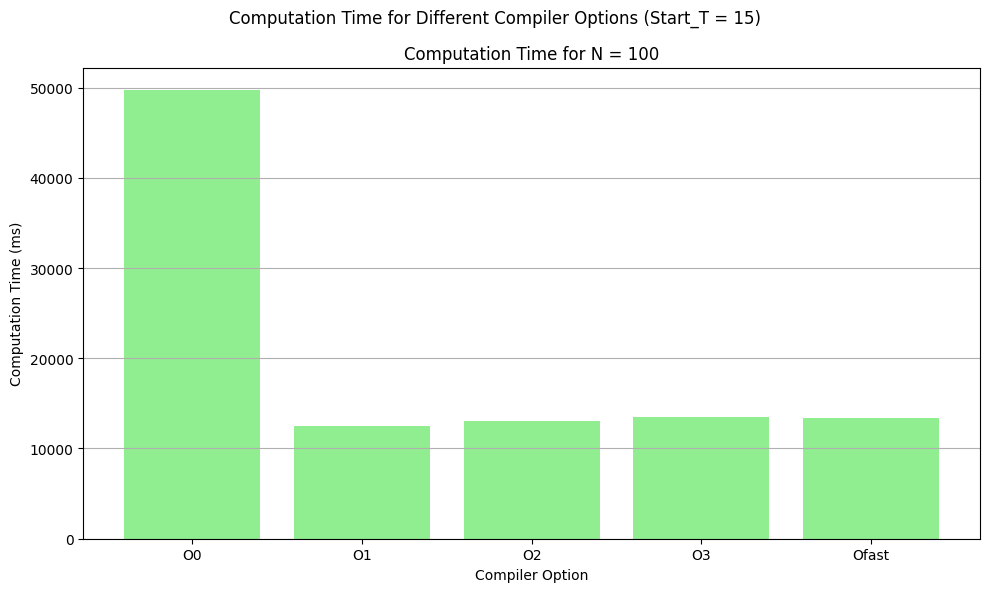

In [ ]:
# DataFrames (replace these with your actual dataframes)
dataframes = {
    'Compiler O0': data_j_o,
    'Compiler O1': data_j_o1,
    'Compiler O2': data_j_o2,
    'Compiler O3': data_j_o3,
    'Compiler Ofast': data_j_ofast
}

# Filtered data for N = 5 and N = 100, T = 15
data_filtered_o0_N100 = data_j_o[(data_j_o['N'] == 100) & (data_j_o['T'] == 15)]
data_filtered_o1_N100 = data_j_o1[(data_j_o1['N'] == 100) & (data_j_o1['T'] == 15)]
data_filtered_o2_N100 = data_j_o2[(data_j_o2['N'] == 100) & (data_j_o2['T'] == 15)]
data_filtered_o3_N100 = data_j_o3[(data_j_o3['N'] == 100) & (data_j_o3['T'] == 15)]
data_filtered_ofast_N100 = data_j_ofast[(data_j_ofast['N'] == 100) & (data_j_ofast['T'] == 15)]
import matplotlib.pyplot as plt

# Collecting data for N=50 and N=100
compilers = ['O0', 'O1', 'O2', 'O3', 'Ofast']

data_N100 = [
    data_filtered_o0_N100['Time'].values[0],
    data_filtered_o1_N100['Time'].values[0],
    data_filtered_o2_N100['Time'].values[0],
    data_filtered_o3_N100['Time'].values[0],
    data_filtered_ofast_N100['Time'].values[0]
]

# Create subplots
plt.figure(figsize=(10, 6))
# Bar plot for N=100
plt.bar(compilers, data_N100, color='lightgreen')
plt.title('Computation Time for N = 100')
plt.xlabel('Compiler Option')
plt.ylabel('Computation Time (ms)')
plt.grid(axis='y')

# Overall layout
plt.suptitle('Computation Time for Different Compiler Options (Start_T = 15)')
plt.tight_layout()
plt.show()



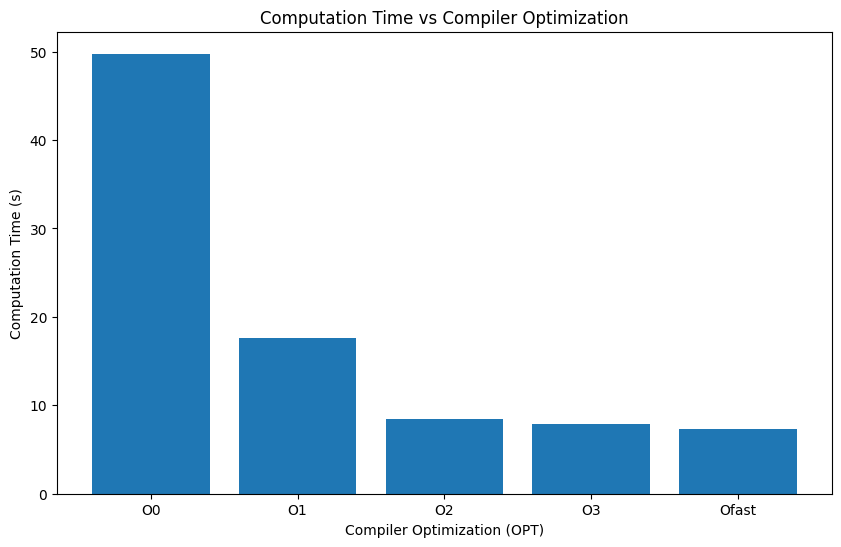

In [ ]:

# Data
data = [
    {"Iter": 1000, "Diff": 20.132577, "Time": 49.75242999, "N": 100, "T": 0, "OPT": "O0"},
    {"Iter": 1000, "Diff": 20.132577, "Time": 17.62257069, "N": 100, "T": 0, "OPT": "O1"},
    {"Iter": 1000, "Diff": 20.132577, "Time": 8.47856970, "N": 100, "T": 0, "OPT": "O2"},
    {"Iter": 1000, "Diff": 20.132577, "Time": 7.88618186, "N": 100, "T": 0, "OPT": "O3"},
    {"Iter": 1000, "Diff": 20.132577, "Time": 7.37009309, "N": 100, "T": 0, "OPT": "Ofast"}
]

# Extract OPT and Time values
opts = [entry["OPT"] for entry in data]
times = [entry["Time"] for entry in data]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(opts, times)
plt.xlabel('Compiler Optimization (OPT)')
plt.ylabel('Computation Time (s)')
plt.title('Computation Time vs Compiler Optimization')
plt.grid(False)
plt.show()
